In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
sns.set(rc={'figure.figsize' : (9,6)})

In [3]:
train_data = pd.read_csv('/Users/artemarhipov/Downloads/event_data_train.csv')
submission_data = pd.read_csv('/Users/artemarhipov/Downloads/submissions_data_train.csv')

In [4]:
submission_data.head()


,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [5]:
train_data.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [6]:
train_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
submission_data['date'] = pd.to_datetime(submission_data.timestamp,unit='s')
submission_data['day'] = submission_data.date.dt.date

In [8]:
train_data['date'] = pd.to_datetime(train_data.timestamp,unit='s')

In [9]:
train_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [10]:
train_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [11]:
train_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [12]:
train_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [13]:
train_data['day'] = train_data.date.dt.date

In [14]:
train_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [15]:
submission_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [16]:
train_data.groupby('day').user_id.nunique()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

<AxesSubplot:xlabel='day'>

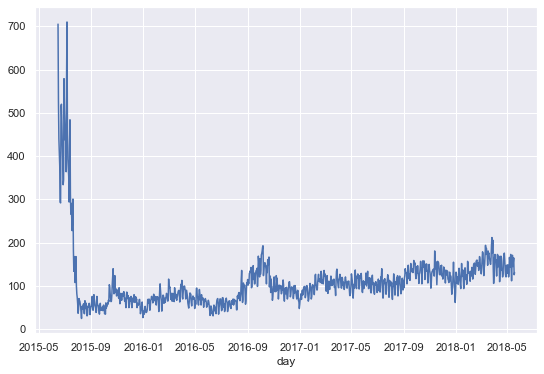

In [17]:
train_data.groupby('day').user_id.nunique().plot()

## count of steps, passed every user (not unique)

In [18]:
train_data[train_data.action == 'passed'] \
.groupby('user_id')\
.agg({'step_id' : 'count'})\
.rename(columns ={'step_id':'passed_steps'})

,passed_steps
user_id,
2,9
3,87
5,11
7,1
8,84
...,...
26789,2
26790,8
26794,69


In [19]:
#train_data[train_data.action == 'passed'] \
#.groupby('user_id')\
#.agg({'step_id' : 'count'})\
#.rename(columns ={'step_id':'passed_steps'}).hist()

In [20]:
users_events_data = train_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0)\
.reset_index()

In [21]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


<AxesSubplot:>

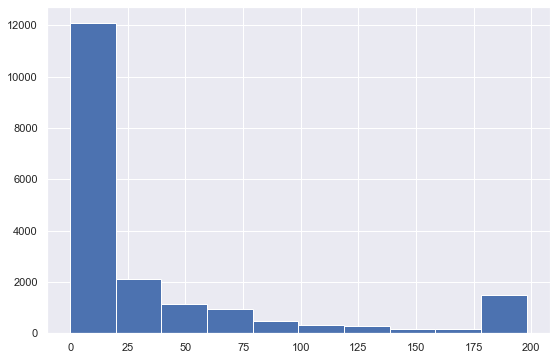

In [22]:
train_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0)\
.reset_index().discovered.hist()

In [23]:
users_scores = submission_data.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',fill_value=0)\
.reset_index()

In [24]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


## time, between unique days on course

In [25]:
train_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).head()

user_id
1                                                  []
2                                           [4843602]
3    [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                          [33702812]
7                                                  []
Name: timestamp, dtype: object

In [26]:
gap_data = train_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [27]:
gap_data = pd.Series(np.concatenate(gap_data,axis=0))

## Timebreaks between course enterings

In [28]:
gap_data = gap_data / (24*60*60)

<AxesSubplot:>

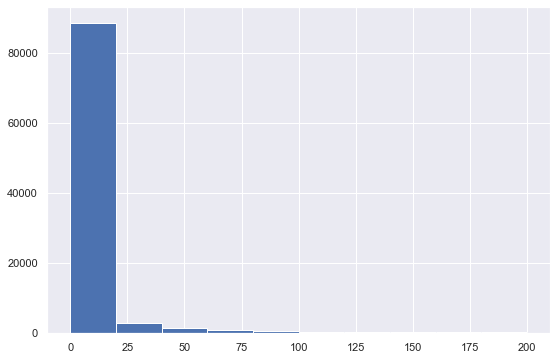

In [29]:
gap_data[gap_data < 200].hist()

In [30]:
gap_data.quantile(0.95)

59.760440972222156

In [31]:
gap_data.quantile(0.90)

18.325995370370403

## define timebreak, that means no entrying later 

In [32]:
train_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [33]:
train_data.groupby('user_id',as_index = False)\
    .agg({'timestamp' : 'max'}).head()

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660


In [34]:
now = 1526772811
drop_out_threshold = 30*60*24*60

In [35]:
users_data = train_data.groupby('user_id',as_index = False)\
    .agg({'timestamp' : 'max'}).rename(columns = {'timestamp' : 'last_timestamp'})

In [36]:
users_data['is_gone_user'] = (now - users_data['last_timestamp']) > drop_out_threshold

In [37]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [38]:
users_data = users_data.merge(users_scores,how='outer')

In [39]:
users_data = users_data.fillna(0)

In [40]:
users_data = users_data.merge(users_events_data,how='outer')

In [41]:
users_days = train_data.groupby('user_id').day.nunique()

In [42]:
users_days = users_days.to_frame().reset_index()

In [43]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [44]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [45]:
users_data = users_data.merge(users_days,how='outer')

In [46]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [47]:
users_data.user_id.nunique()

19234

In [48]:
users_data['passed_course'] = users_data.passed > 170

In [49]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [50]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [51]:
user_min_time = train_data.groupby('user_id',as_index = False) \
        .agg({'timestamp' : 'min'}).rename({'timestamp':'min_timestamp'}, axis = 1)

In [54]:
users_data = users_data.merge(user_min_time, how = 'outer')

In [55]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,1495287049
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316
